# Instructions

Task 2:
1. Have a file face_predictor.py or equivalent that takes one string that represents the access code for https://hackattic.com/challenges/basic_face_detection ...
2. ... that returns the json structure face_tiles that fulfils the requirements in the hackattic challenge
3. Feel free to use hackattic and even the discussion board for hints.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import json

import face_recognition
import cv2

In [113]:
#set up URL for requests module

token = 'YOUR_TOKEN_HERE'     #your token goes here

url = 'https://hackattic.com/challenges/basic_face_detection/problem?access_token='+token

url    #check url

'https://hackattic.com/challenges/basic_face_detection/problem?access_token=YOUR_TOKEN_HERE'

In [98]:
#get the image URL from the JSON and download the image

response = requests.get(url)

jayson = json.loads(response.text)

image_url = jayson['image_url']

img_response = requests.get(image_url)

if img_response.status_code == 200:
    
    with open("faces.jpg", 'wb') as f:
        f.write(img_response.content)
        f.close()

In [99]:
# Image is 8x8 images, 800x800 pixels. Images are all squares of 100x100 pixels.

# Load the image in as a numpy array
img = cv2.imread('faces.jpg',0)

In [100]:
#find out shape of the data
img.shape

(800, 800)

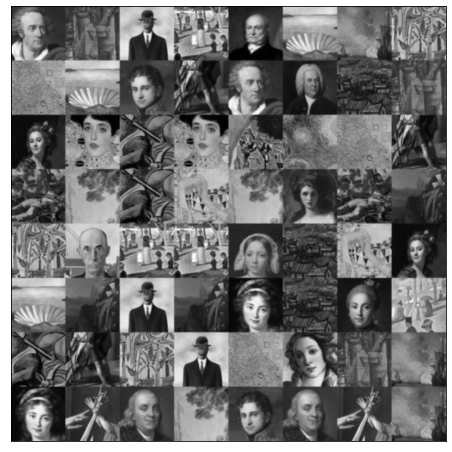

In [101]:
#show whole image, generated from the numerical data

plt.figure(figsize=(8,8))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [102]:
# img.shape corresponds to image dimensions so each point in the array should represent a pixel
# need to break this large matrix into 64 matrices, 1 for each image
# testing with 1 image

toy_image = img[:100,:100]

In [103]:
#verify toy image shape is 100x100 px
toy_image.shape

(100, 100)

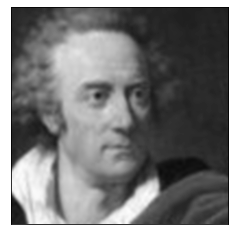

In [104]:
#show first image

plt.imshow(toy_image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [105]:
# test facial recognition
toy_face_loc = face_recognition.face_locations(toy_image)
toy_face_loc

[(20, 72, 72, 20)]

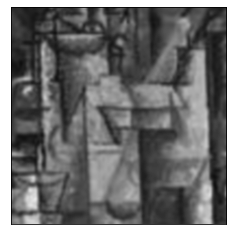

In [106]:
toy_image2 = img[0:100,101:200]
plt.imshow(toy_image2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [107]:
toy_face_loc2 = face_recognition.face_locations(toy_image2)

In [108]:
toy_face_loc2

[]

In [109]:
#face_recognition.face_locations returns an empty list if no faces are detected

#sequentially run through all 64 images

sub_img_width = 100 

sub_img_height = sub_img_width  #in this case the images are square

img_rows = int(img.shape[1]/sub_img_width)
img_cols = int(img.shape[0]/sub_img_height)

position_lst = []    #instantiate empty list for positions

for r in range(img_rows):
    
    for c in range(img_cols):
        itr_btm = (r+1)*100    #get bottom-most edge of sub-image, then use this to get top-most edge
        
        itr_right = (c+1)*100    #get right-most edge of sub-image, then use this to get left-most edge
        
        itr_img = img[itr_btm-100 : itr_btm , itr_right-100 : itr_right]    #get image for the current iteration
        
        itr_face_loc = face_recognition.face_locations(itr_img)    #run facial recognition
        
        if len(itr_face_loc) == 0:    #skip to next iteration if no faces located
            pass
        
        else:
            
            position_lst.append([r,c])

In [110]:
#visually inspect results

position_lst

[[0, 0],
 [0, 4],
 [1, 2],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 1],
 [2, 3],
 [3, 5],
 [4, 1],
 [4, 4],
 [4, 7],
 [5, 4],
 [5, 6],
 [6, 5],
 [7, 0],
 [7, 2],
 [7, 4],
 [7, 5]]

In [132]:
pos_json = {'face_tiles':position_lst}

print(pos_json)

{'face_tiles': [[0, 0], [0, 4], [1, 2], [1, 4], [1, 5], [2, 0], [2, 1], [2, 3], [3, 5], [4, 1], [4, 4], [4, 7], [5, 4], [5, 6], [6, 5], [7, 0], [7, 2], [7, 4], [7, 5]]}


In [111]:
#post results to API and get response

solve_url = 'https://hackattic.com/challenges/basic_face_detection/solve?access_token='+token

headers = {'Content-Type': 'application/json', 'Accept':'application/json'}    #post the data as a JSON to the API

r = requests.post(solve_url, headers=headers, json=pos_json)

r.text

'{"result": "passed"}'